#### Logistic Regression - Digit Recognition

In [3]:
# import modules

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [4]:
# load the digit dataset

digits = load_digits()

In [6]:
# print the image shapes

print(f'Image Data Shape: {digits.data.shape}')
print(f'Label Data Shape: {digits.target.shape}')

Image Data Shape: (1797, 64)
Label Data Shape: (1797,)


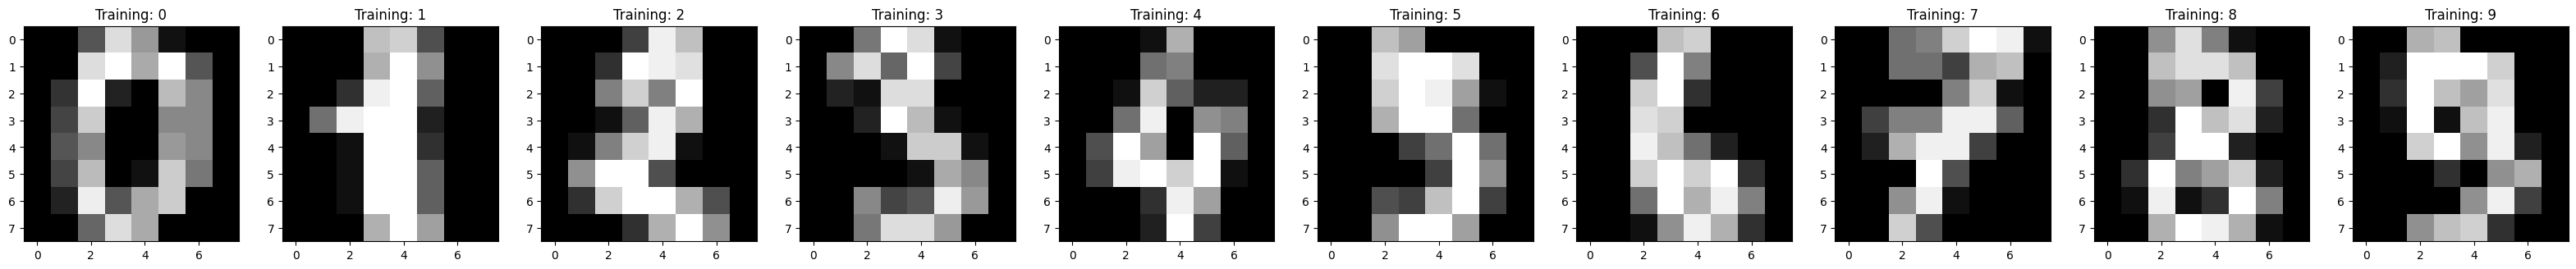

In [11]:
# plot sample images

plt.figure(figsize=(40,8))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
  plt.subplot(1, 10, index+1)
  plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
  plt.title(f'Training: {label}', fontsize=12)

In [14]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [16]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1383, 64) (1383,) (414, 64) (414,)


In [24]:
# model training
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
logisticRegression.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
print(logisticRegression.predict(x_test[3].reshape(1, -1)))

[1]


In [25]:
# predict the outcomes
predictions = logisticRegression.predict(x_test)

In [29]:
score = logisticRegression.score(x_test, y_test)
print(score * 100)

95.16908212560386


In [30]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

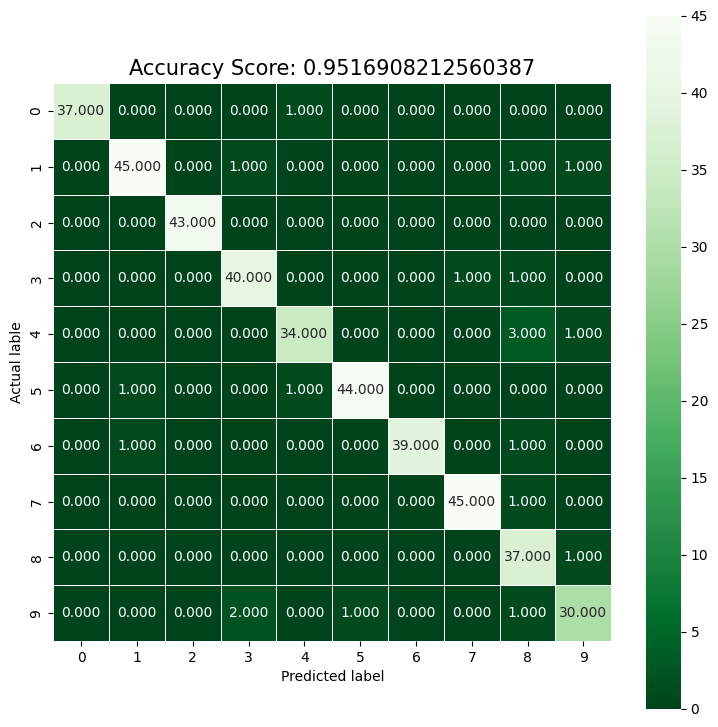

In [35]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap = 'Greens_r')
plt.ylabel('Actual lable')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {score}'
plt.title(all_sample_title, size=15)

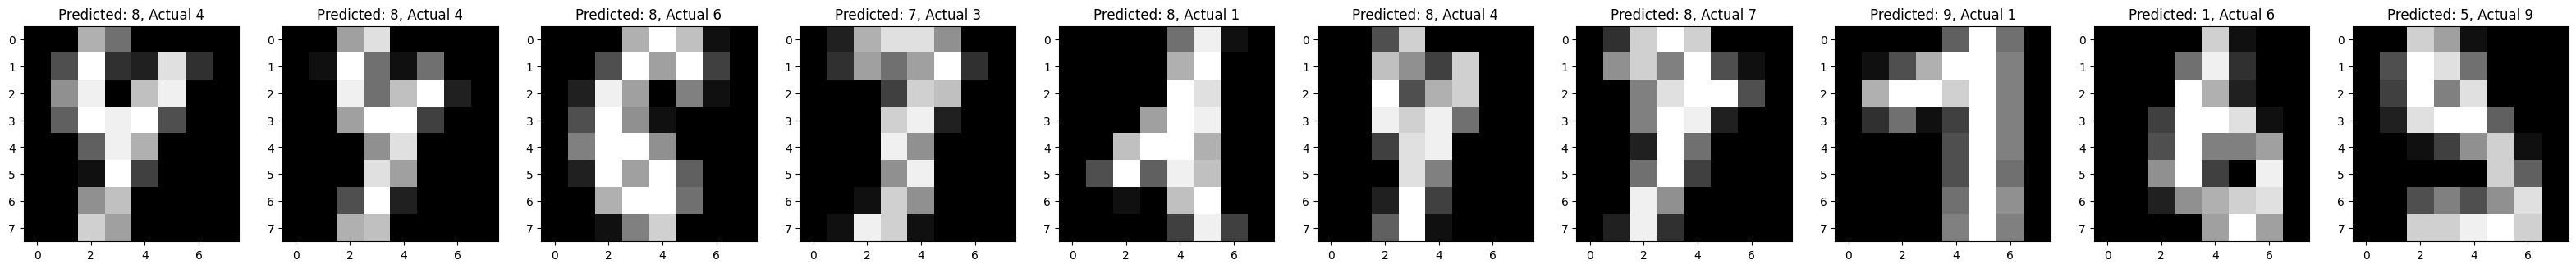

In [42]:
# Testing!

iter = 0
classifiedWrongIter = []
for predict, actual in zip(predictions, y_test):
  if predict!=actual:
    classifiedWrongIter.append(iter)
  iter += 1

plt.figure(figsize=(40,8))
for plotIter, wrong in enumerate(classifiedWrongIter[0:10]):
  plt.subplot(1, 10, plotIter+1)
  plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
  plt.title(f'Predicted: {predictions[wrong]}, Actual {y_test[wrong]}', fontsize=12)

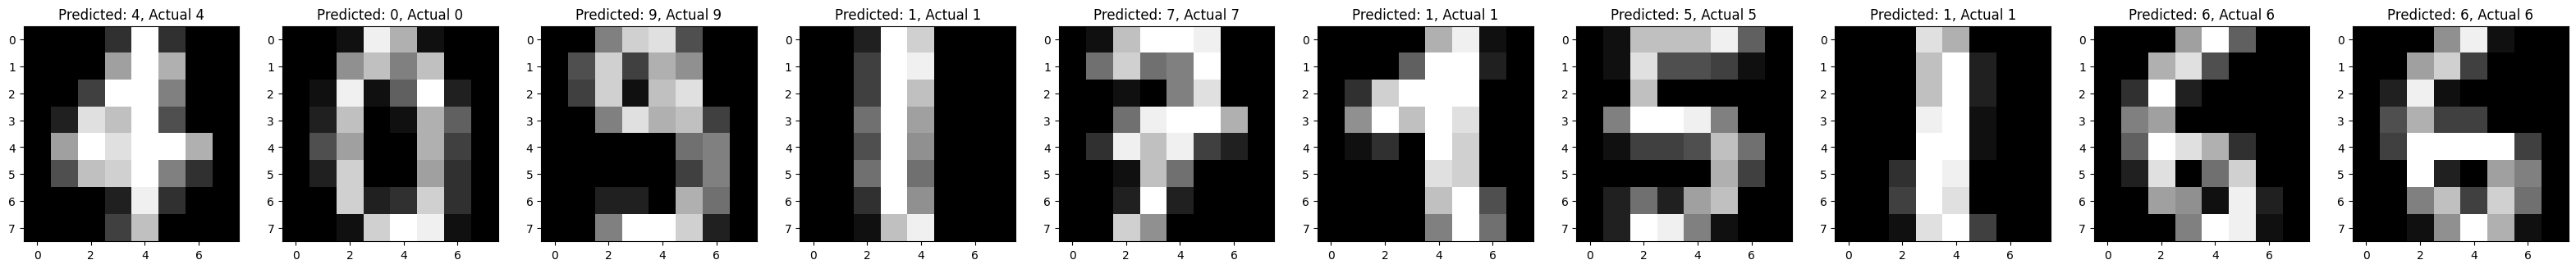

In [43]:
# Testing!

iter = 0
classifiedCorrectIter = []
for predict, actual in zip(predictions, y_test):
  if predict==actual:
    classifiedCorrectIter.append(iter)
  iter += 1

plt.figure(figsize=(40,8))
for plotIter, correct in enumerate(classifiedCorrectIter[0:10]):
  plt.subplot(1, 10, plotIter+1)
  plt.imshow(np.reshape(x_test[correct], (8,8)), cmap=plt.cm.gray)
  plt.title(f'Predicted: {predictions[correct]}, Actual {y_test[correct]}', fontsize=12)